# Analise Linear 

##  Discover São Paulo: Apartment Prices Insights $$ (base kaggle)
A Deep Dive into São Paulo’s Property Pricing and Trends

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt




In [2]:
# carregar dataset
df =  pd.read_csv('SaoPaulo_OnlyAppartments.csv')

In [4]:
df.head()


,ID,created_date,Price,below_price,Area,Adress,Bedrooms,Bathrooms,Parking_Spaces,extract_date
0,2742871875,2018-05-24T15:02:18Z,2000000,False,62,"Alameda Casa Branca 909, Jardim Paulista - São...",1,1,1,2024-11-22
1,2670612721,2018-12-18T14:40:10Z,1015680,False,42,"Rua Doutor Guilherme Bannitz 61, Itaim Bibi - ...",1,1,1,2024-11-22
2,2752273106,2018-03-28T09:37:42Z,490000,False,31,"Avenida Professor Francisco Morato 292, Butant...",1,1,1,2024-11-22
3,2730614854,2022-03-17T20:07:18Z,850000,False,50,"Avenida Doutor Cardoso de Melo 04545003, Vila ...",1,1,1,2024-11-22
4,2756989746,2018-03-27T23:24:33Z,209100,False,37,"Rua Serra de São Domingos 100, Vila Carmosina ...",1,1,1,2024-11-22


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828 entries, 0 to 27827
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              27828 non-null  int64 
 1   created_date    27828 non-null  object
 2   Price           27828 non-null  int64 
 3   below_price     27828 non-null  bool  
 4   Area            27828 non-null  int64 
 5   Adress          27828 non-null  object
 6   Bedrooms        27828 non-null  int64 
 7   Bathrooms       27828 non-null  int64 
 8   Parking_Spaces  27828 non-null  int64 
 9   extract_date    27828 non-null  object
dtypes: bool(1), int64(6), object(3)
memory usage: 1.9+ MB


In [6]:
df.describe()


,ID,Price,Area,Bedrooms,Bathrooms,Parking_Spaces
count,2.782800e+04,2.782800e+04,27828.000000,27828.000000,27828.000000,27828.000000
mean,2.685599e+09,2.037172e+06,136.288163,2.740477,2.831177,2.153730
std,2.250889e+08,2.894259e+06,92.053324,0.921697,1.435586,2.927744
min,3.641814e+07,1.000000e+05,10.000000,1.000000,1.000000,0.000000
25%,2.681157e+09,7.500000e+05,73.000000,2.000000,2.000000,1.000000
50%,2.734779e+09,1.319972e+06,112.000000,3.000000,3.000000,2.000000
75%,2.750170e+09,2.300000e+06,171.000000,3.000000,4.000000,3.000000
max,2.758322e+09,1.220290e+08,3367.000000,20.000000,20.000000,350.000000


In [7]:
df.isnull().sum()


ID                0
created_date      0
Price             0
below_price       0
Area              0
Adress            0
Bedrooms          0
Bathrooms         0
Parking_Spaces    0
extract_date      0
dtype: int64

In [9]:
# Classificar below_price como numero
df['below_price'] = LabelEncoder().fit_transform(df['below_price'].astype(str))

# Seleciona as colunas mais relevantes 
features = ['Area', 'Bathrooms', 'Parking_Spaces','below_price']
target = 'Price'

df= df[features + [target]].dropna()

#Separando X e y
X = df[features]
y = df[target] 

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
models = {
    "LinearRegression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():

    # treino
    model.fit(X_train, y_train)

    # previsão
    y_pred = model.predict(X_test)

    # métrica
    rmse = mean_squared_error(y_test, y_pred) ** 0.5

    results.append({
        "Model": name,
        "RMSE": rmse
    })

results_df = pd.DataFrame(results).sort_values("RMSE")

results_df


,Model,RMSE
3,RandomForest,1.727240e+06
0,LinearRegression,1.751516e+06
1,KNN,2.018227e+06
2,DecisionTree,2.189504e+06


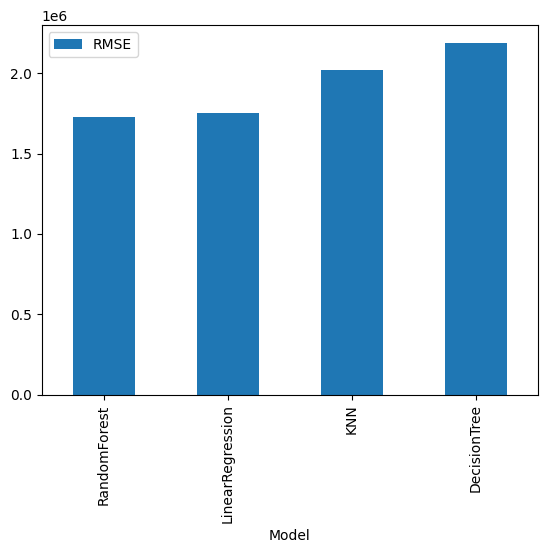

In [13]:
results_df.plot(x="Model", y="RMSE", kind="bar")
plt.show()


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

models = {
    "LinearRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor())
    ]),
    
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    
    "RandomForest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred)**0.5

    results.append({
        "Model": name,
        "RMSE": rmse
    })

results_df = pd.DataFrame(results).sort_values("RMSE")

results_df


,Model,RMSE
3,RandomForest,1.727240e+06
0,LinearRegression,1.751516e+06
1,KNN,1.779941e+06
2,DecisionTree,2.189504e+06


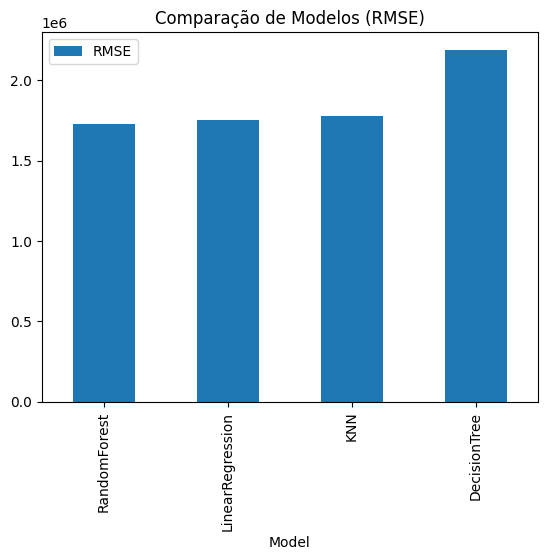

In [15]:
results_df.plot(x="Model", y="RMSE", kind="bar")
plt.title("Comparação de Modelos (RMSE)")
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Pipeline profissional
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor())
])

# parâmetros para testar
param_grid = {
    "model__n_neighbors": [3,5,7,9,15],
    "model__weights": ["uniform", "distance"]
}

# Grid Search
grid_knn = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': [3, 5, 7, 9, 15],
                         'model__weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [17]:
print("Melhor parâmetros:", grid_knn.best_params_)


Melhor parâmetros: {'model__n_neighbors': 15, 'model__weights': 'uniform'}


In [18]:
best_knn = grid_knn.best_estimator_

y_pred = best_knn.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)**0.5

print("RMSE otimizado:", rmse)


RMSE otimizado: 1568296.4464652624
